# Query HUC Boundaries

In [1]:
%pylab inline

import urllib.parse
import urllib.request

import geojson
import geopandas as gpd

import xarray as xr

#import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
huc4 = gpd.read_file('https://fortress.wa.gov/ecy/gisprod/arcgis/rest/services/NHD/NHD_WBD_HUC4/MapServer/0/query?outFields=*&where=1%3D1&f=geojson', index='OBJECTID')
huc4

,OBJECTID,TNMID,LoadDate,AreaSqKm,AreaAcres,GNIS_ID,Name,States,HUC4,Shape.STArea(),Shape.STLength(),geometry
0,1,{8991C5D9-1F39-43C2-9BE1-D7C42C914590},1505730997000,134754.30,33298484.04,None,Kootenai-Pend Oreille-Spokane,"CN,ID,MT,WA",1701,2.056071e+11,4.013672e+06,"POLYGON ((-116.71934 47.09248, -116.71934 47.0..."
1,2,{14BCB233-70F0-46D1-AAE1-1484A0077438},1506945791000,119755.57,29592219.47,None,Upper Columbia,"CN,WA",1702,9.321000e+11,8.072454e+06,"POLYGON ((-117.63186 50.07614, -117.63186 50.0..."
2,3,{9D7F50CA-5934-4EE8-A641-94304ED178D6},1510001212000,15928.20,3935940.28,None,Yakima,WA,1703,1.714279e+11,2.716030e+06,"POLYGON ((-121.11362 47.59723, -121.11398 47.5..."
3,4,{8D7B5CFF-8C05-456D-8046-34B479DA8881},1510001211000,52958.23,13086251.56,None,Puget Sound,"CN,WA",1711,5.704186e+11,6.232523e+06,"POLYGON ((-121.11362 47.59723, -121.11352 47.5..."
4,5,{347F3BB9-FFEF-4769-8822-BEB046B4012E},1519647291000,16120.64,3983493.36,None,Lower Columbia,"OR,WA",1708,1.735078e+11,3.430440e+06,"POLYGON ((-121.52268 46.87346, -121.52278 46.8..."
5,6,{38E96C56-015B-4F57-8791-E9CECF5F48AB},1519647295000,65238.91,16120871.64,None,Oregon-Washington Coastal,"CA,OR,WA",1710,1.907672e+11,3.308971e+06,"POLYGON ((-122.44586 46.68302, -122.44540 46.6..."
6,7,{937692D1-AA77-4FD0-936D-CB7FB06086DA},1509996060000,77449.03,19138054.76,None,Middle Columbia,"OR,WA",1707,2.188941e+11,4.711118e+06,"POLYGON ((-117.94719 45.87704, -117.94622 45.8..."
7,8,{91BB9619-6BBE-4D03-86F6-F26CF3FAB03F},1503573313000,90764.30,22428328.00,None,Lower Snake,"ID,MT,OR,WA",1706,2.796701e+11,4.785471e+06,"POLYGON ((-116.71934 47.09248, -116.71934 47.0..."


In [3]:
huc4.index = huc4['OBJECTID']
huc4 = huc4.drop(columns='OBJECTID')
huc4

,TNMID,LoadDate,AreaSqKm,AreaAcres,GNIS_ID,Name,States,HUC4,Shape.STArea(),Shape.STLength(),geometry
OBJECTID,,,,,,,,,,,
1,{8991C5D9-1F39-43C2-9BE1-D7C42C914590},1505730997000,134754.30,33298484.04,None,Kootenai-Pend Oreille-Spokane,"CN,ID,MT,WA",1701,2.056071e+11,4.013672e+06,"POLYGON ((-116.71934 47.09248, -116.71934 47.0..."
2,{14BCB233-70F0-46D1-AAE1-1484A0077438},1506945791000,119755.57,29592219.47,None,Upper Columbia,"CN,WA",1702,9.321000e+11,8.072454e+06,"POLYGON ((-117.63186 50.07614, -117.63186 50.0..."
3,{9D7F50CA-5934-4EE8-A641-94304ED178D6},1510001212000,15928.20,3935940.28,None,Yakima,WA,1703,1.714279e+11,2.716030e+06,"POLYGON ((-121.11362 47.59723, -121.11398 47.5..."
4,{8D7B5CFF-8C05-456D-8046-34B479DA8881},1510001211000,52958.23,13086251.56,None,Puget Sound,"CN,WA",1711,5.704186e+11,6.232523e+06,"POLYGON ((-121.11362 47.59723, -121.11352 47.5..."
5,{347F3BB9-FFEF-4769-8822-BEB046B4012E},1519647291000,16120.64,3983493.36,None,Lower Columbia,"OR,WA",1708,1.735078e+11,3.430440e+06,"POLYGON ((-121.52268 46.87346, -121.52278 46.8..."
6,{38E96C56-015B-4F57-8791-E9CECF5F48AB},1519647295000,65238.91,16120871.64,None,Oregon-Washington Coastal,"CA,OR,WA",1710,1.907672e+11,3.308971e+06,"POLYGON ((-122.44586 46.68302, -122.44540 46.6..."
7,{937692D1-AA77-4FD0-936D-CB7FB06086DA},1509996060000,77449.03,19138054.76,None,Middle Columbia,"OR,WA",1707,2.188941e+11,4.711118e+06,"POLYGON ((-117.94719 45.87704, -117.94622 45.8..."
8,{91BB9619-6BBE-4D03-86F6-F26CF3FAB03F},1503573313000,90764.30,22428328.00,None,Lower Snake,"ID,MT,OR,WA",1706,2.796701e+11,4.785471e+06,"POLYGON ((-116.71934 47.09248, -116.71934 47.0..."


<AxesSubplot:>

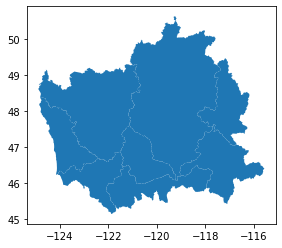

In [4]:
huc4.plot()

In [5]:
huc4.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
huc4_path = '../../data/geometry/huc4.geojson'
try:
    os.remove(huc4_path)
except:
    pass
huc4.to_file(huc4_path)

Cool, that was easy.

In [6]:
huc8 = gpd.read_file('https://fortress.wa.gov/ecy/gisprod/arcgis/rest/services/NHD/NHD_WBD_HUC8/MapServer/0/query?outFields=*&where=1%3D1&f=geojson')
huc8

,OBJECTID,TNMID,LoadDate,AreaSqKm,AreaAcres,GNIS_ID,Name,States,HUC8,Shape.STArea(),Shape.STLength(),geometry
0,1,{16148E94-3C6C-4D82-872E-C061F98BDE7A},1511304382000,3362.55,830902.26,None,Upper Chehalis,WA,17100103,3.618820e+10,1.212762e+06,"POLYGON ((-123.18821 47.03971, -123.18852 47.0..."
1,2,{9E5F5F07-1869-41C5-8C09-E39B46EA1C50},1358517314000,2118.55,523505.03,None,Lower Chehalis,WA,17100104,2.280235e+10,9.466051e+05,"POLYGON ((-123.54264 47.54021, -123.54288 47.5..."
2,3,{51E6CBD8-EC8D-4D71-A584-0A27ED3E7D02},1358517314000,1520.73,375780.47,None,Grays Harbor,WA,17100105,1.636761e+10,8.991420e+05,"POLYGON ((-123.63841 47.49743, -123.63858 47.4..."
3,4,{8F32D58A-F91B-4F3A-8245-60BB8CB64776},1519647285000,3282.29,811071.35,None,Willapa Bay,"OR,WA",17100106,3.532441e+10,1.218606e+06,"POLYGON ((-123.58593 46.95406, -123.58619 46.9..."
4,5,{766C6D78-6AC5-45BF-9E7E-3BB6770343E3},1358517314000,1257.91,310836.93,None,Duwamish,WA,17110013,1.353979e+10,1.020611e+06,"POLYGON ((-122.31566 47.56753, -122.31584 47.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,{8374AD91-7879-4BDC-ABC4-C000C637D633},1358517314000,1818.76,449425.75,None,Stillaguamish,WA,17110008,1.958983e+10,1.042554e+06,"POLYGON ((-121.90299 48.45165, -121.90302 48.4..."
68,69,{E3BBAA68-F450-4243-B541-D1C5A2BBCF0A},1510001192000,1788.75,442009.76,None,Snoqualmie,WA,17110010,1.925656e+10,8.380657e+05,"POLYGON ((-121.96849 47.81844, -121.96920 47.8..."
69,70,{C78AC8F0-513F-4BB6-A851-C5ECF209833F},1458820866000,768.69,189946.58,None,Snohomish,WA,17110011,8.277697e+09,6.642695e+05,"POLYGON ((-122.12975 48.16792, -122.13009 48.1..."
70,71,{4BA555F3-F0B0-46D3-838F-C67F6854113B},1358517315000,3932.50,971740.70,None,Lower Grande Ronde,"OR,WA",17060106,4.232868e+10,1.197956e+06,"POLYGON ((-117.61776 46.15549, -117.61889 46.1..."


In [7]:
huc8.index = huc8['OBJECTID']
huc8 = huc8.drop(columns='OBJECTID')
huc8

,TNMID,LoadDate,AreaSqKm,AreaAcres,GNIS_ID,Name,States,HUC8,Shape.STArea(),Shape.STLength(),geometry
OBJECTID,,,,,,,,,,,
1,{16148E94-3C6C-4D82-872E-C061F98BDE7A},1511304382000,3362.55,830902.26,None,Upper Chehalis,WA,17100103,3.618820e+10,1.212762e+06,"POLYGON ((-123.18821 47.03971, -123.18852 47.0..."
2,{9E5F5F07-1869-41C5-8C09-E39B46EA1C50},1358517314000,2118.55,523505.03,None,Lower Chehalis,WA,17100104,2.280235e+10,9.466051e+05,"POLYGON ((-123.54264 47.54021, -123.54288 47.5..."
3,{51E6CBD8-EC8D-4D71-A584-0A27ED3E7D02},1358517314000,1520.73,375780.47,None,Grays Harbor,WA,17100105,1.636761e+10,8.991420e+05,"POLYGON ((-123.63841 47.49743, -123.63858 47.4..."
4,{8F32D58A-F91B-4F3A-8245-60BB8CB64776},1519647285000,3282.29,811071.35,None,Willapa Bay,"OR,WA",17100106,3.532441e+10,1.218606e+06,"POLYGON ((-123.58593 46.95406, -123.58619 46.9..."
5,{766C6D78-6AC5-45BF-9E7E-3BB6770343E3},1358517314000,1257.91,310836.93,None,Duwamish,WA,17110013,1.353979e+10,1.020611e+06,"POLYGON ((-122.31566 47.56753, -122.31584 47.5..."
...,...,...,...,...,...,...,...,...,...,...,...
68,{8374AD91-7879-4BDC-ABC4-C000C637D633},1358517314000,1818.76,449425.75,None,Stillaguamish,WA,17110008,1.958983e+10,1.042554e+06,"POLYGON ((-121.90299 48.45165, -121.90302 48.4..."
69,{E3BBAA68-F450-4243-B541-D1C5A2BBCF0A},1510001192000,1788.75,442009.76,None,Snoqualmie,WA,17110010,1.925656e+10,8.380657e+05,"POLYGON ((-121.96849 47.81844, -121.96920 47.8..."
70,{C78AC8F0-513F-4BB6-A851-C5ECF209833F},1458820866000,768.69,189946.58,None,Snohomish,WA,17110011,8.277697e+09,6.642695e+05,"POLYGON ((-122.12975 48.16792, -122.13009 48.1..."


<AxesSubplot:>

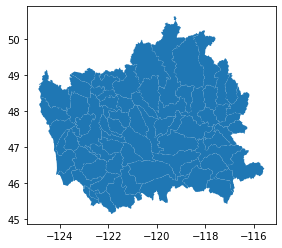

In [8]:
huc8.plot()

In [9]:
huc8.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
huc8_path = '../../data/geometry/huc8.geojson'
try:
    os.remove(huc8_path)
except:
    pass
huc8.to_file(huc8_path)